# 3 Qubit Error Correction Code using Parameterized Quantum Circuit using Stocastic Approach

We implemented a Parameterized Quantum Circuit for 3 Qubits. We added bit-flip noise to the model. Later, we optimized the parameters of the circuit iteratively in order to reduce the error.

Explanation: At the start, 3 Qubits are initialized. q0, q1 and q2
are ancilla bits. A random state is generated as an Input
State. This random state, $|\psi>$ is assigned to the second
qubit, q1. We are adding noise to our circuit in order to
bit flip one qubit. Our aim is retrieving the original input
state even after noise is added to the model by optimizing the parameters iteratively. Therefore,
our target state |$\hat{\psi}$> is equivalent to our input state |$\psi$>.

In [17]:
import numpy as np 
import math
np.random.seed(20)

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.extensions import Initialize

# Building Blocks of The Parametric Circuit

## Encoder Circuit

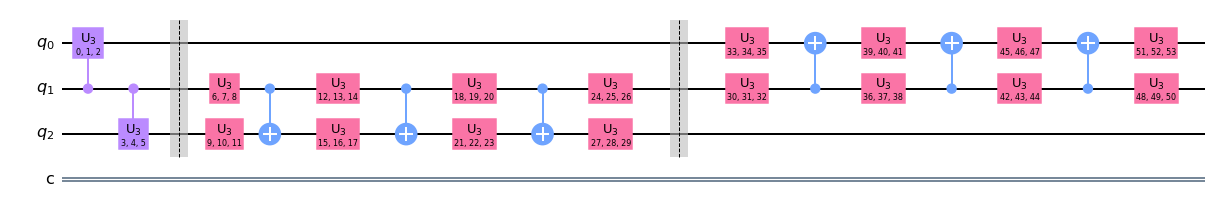

In [18]:
# Defining Encoder circuit. Parameters and input state is given as arguments.
def encoder(params):
    qc = QuantumCircuit(3, 1, name = 'Encoder')
    
    qc.cu3(params[0], params[1], params[2], 1, 0)
    qc.cu3(params[3], params[4], params[5], 1, 2)
    
    qc.barrier()
    
    for i in range(1, 5):
        qc.u3(params[6 * i], params[6 * i + 1], params[6 * i + 2], 1)
        qc.u3(params[6 * i + 3], params[6 * i + 4], params[6 * i + 5], 2)
        
        if(i != 4):
            qc.cx(1,2)
        
    qc.barrier()
        
    for i in range(5, 9):
        qc.u3(params[6 * i], params[6 * i + 1], params[6 * i + 2],1)
        qc.u3(params[6 * i + 3], params[6 * i + 4], params[6 * i + 5],0)
        
        if(i != 8):
            qc.cx(1,0)
    

    return qc

# visualizing Encoder to check
params = np.arange(0, 54)
# initial_state = [0, 1]
# q1_state = Initialize(initial_state)
encoder(params).draw(output='mpl')

## Decoder Circuit

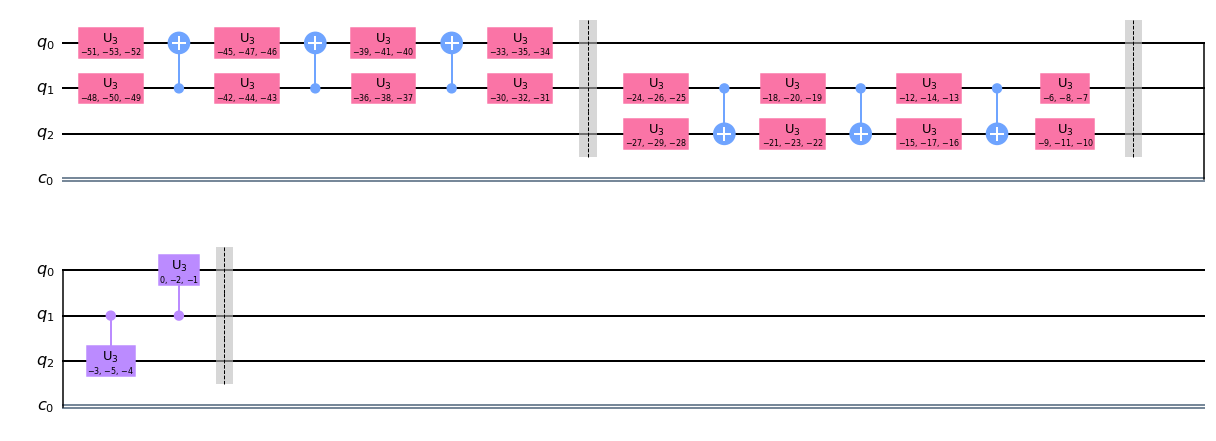

In [19]:
# Defining Decoder circuit. Decoder is inversion of Encoder.
def decoder(encoder):
    dec = encoder.inverse()
    dec.name = 'Decoder'
    dec.barrier()
    
    return dec

# visualizing Decoder to check
params = np.arange(0, 54)
decoder(encoder(params)).draw(output='mpl', cregbundle = False)

## Complete Circuit

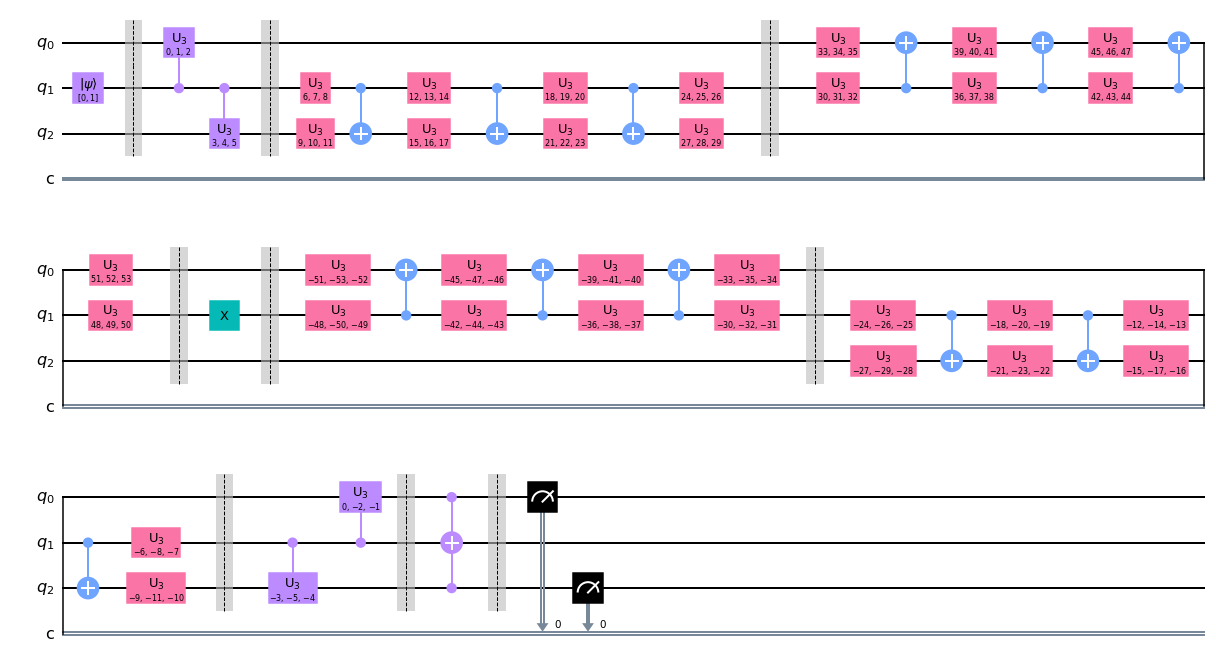

In [20]:
def get_var_form(params, q1_state, error_qubit):
#     global target_state
#     if error_qubit == -1:
#         target_state = np.array((input_state[0], 0, input_state[1], 0, 0, 0, 0, 0))
#     elif error_qubit == 0:
#         target_state = np.array((0, input_state[0], 0, input_state[1], 0, 0, 0, 0))
#     elif error_qubit== 1:
#         target_state = np.array((0, 0, 0, 0, 0, input_state[0], 0, input_state[1]))
#     elif error_qubit == 2:
#         target_state = np.array((0, 0, 0, 0, input_state[0], 0, input_state[1], 0))
    
    # Adding input state
    qc = QuantumCircuit(3, 1)
    qc.append(q1_state, [1])
    qc.barrier()

    # Creating encoder circuit
#     enc = encoder(params)
#     # Appending encoder sub-circuit to the main qc. (alternate to qc += enc)
#     qc.append(enc.to_instruction(), enc.qubits)
#     qc.barrier()
    enc = encoder(params)
    qc += enc
    
    qc.barrier()
    
    # Adding error to Quantum Circuit
#     error_decision = np.random.choice([0, 1], p=[0, 1])
#     if(error_decision == 1):
#         error_qubit = np.random.randint(3)
#         qc.x(error_qubit)
#         qc.barrier()
    if(error_qubit != -1):
        qc.x(error_qubit)
        qc.barrier()
    
    # Creating encoder circuit
#     dec = decoder(enc)
#     # Appending decoder sub-circuit to the main qc. (alternate to qc += dec)
#     qc.append(dec.to_instruction(), dec.qubits)
    dec = decoder(enc)
    qc += dec
    
    qc.ccx(0,2,1)
    qc.barrier()
    
    # Measuring ancilla qubits
    qc.measure([0, 2], [0, 0])
    
#     if error_qubit == -1:
#         target_state = np.array((input_state[0], 0, input_state[1], 0, 0, 0, 0, 0))
#     elif error_qubit == 0:
#         target_state = np.array((0, input_state[0], 0, input_state[1], 0, 0, 0, 0))
#     elif error_qubit== 1:
#         target_state = np.array((0, 0, 0, 0, 0, input_state[0], 0, input_state[1]))
#     elif error_qubit == 2:
#         target_state = np.array((0, 0, 0, 0, input_state[0], 0, input_state[1], 0))
#     qc.cx(1,0)
#     qc.cx(1,2)
#     qc.barrier()
    
#     if(error_qubit != -1):
#         qc.x(error_qubit)
#         qc.barrier()
        
#     qc.cx(1,0)
#     qc.cx(1,2)
#     qc.ccx(0,2,1)
#     qc.measure([0, 2], [0, 0])    
        
    return qc


# visualizing complete circuit to check
params = np.arange(0, 54)
q1_state = [0, 1]
input_state = q1_state
q1_state = Initialize(q1_state)
get_var_form(params, q1_state, 1).draw(output='mpl')

In [21]:
# # Import Aer
# from qiskit import Aer, execute
# # Run the quantum circuit on a statevector simulator backend
# backend = Aer.get_backend('statevector_simulator')
# # Creating random input state
# q1_state = np.random.rand(2) + np.random.rand(2)*1j

# #q1_state = [0, 1]
# # Normalizing input state
# q1_state = q1_state/(np.linalg.norm(q1_state))
# input_state = q1_state
# # Initializing target state according to the input state
# # target_state = np.array((q1_state[0], 0, q1_state[1], 0, 0, 0, 0, 0))
# # target_state = np.array((0, 0, 0, 0, q1_state[0], 0, q1_state[1], 0))
# # target_state = np.array((0, q1_state[0], 0, q1_state[1], 0, 0, 0, 0))
# #target_state = np.array((0, 0, 0, 0, 0, q1_state[0], 0, q1_state[1]))
# target_state = []
# q1_state = Initialize(q1_state)
# get_var_form(params, q1_state, -1).draw(output='mpl')
# qc = get_var_form(params, q1_state, -1)
# # Obtain a quantum circuit instance from the paramters
# # Execute the quantum circuit to obtain the probability distribution associated with the current parameters
# result = execute(qc, backend).result()
# output_state = result.get_statevector(qc)
# output_state = np.array(output_state)
# # adding cost for single circuit
# print(target_state)
# print(output_state)

# cost = np.linalg.norm(output_state - target_state)

# print(cost)

## Generalized Output State

In [22]:
def gen_states(output_state, target_state):
    alpha = math.sqrt((abs(output_state[0]) ** 2) + (abs(output_state[1]) ** 2) + (abs(output_state[4]) ** 2) + (abs(output_state[5]) ** 2))
    beta = None
    
    if abs(alpha) <= 1e-15:
        beta = math.sqrt((abs(output_state[2]) ** 2) + (abs(output_state[3]) ** 2) + (abs(output_state[6]) ** 2) + (abs(output_state[7]) ** 2))
    else:
        beta = ( (output_state[2] + output_state[3] + output_state[6] + output_state[7]) / (output_state[0] + output_state[1] + output_state[4] + output_state[5]) ) * alpha
    
    if abs(alpha) <= 1e-15:
        beta = abs(beta)
    else:
        beta = (beta / alpha) * abs(alpha)
    alpha = abs(alpha)
    
    a, b = target_state[0], target_state[1]
    if abs(a) <= 1e-15:
        b = abs(b)
    else:
        b = (b / a) * abs(a)
    a = abs(a)
    
    return np.array([alpha, beta]), np.array([a, b])

In [23]:
# a = 7.265845659e-16
# if math.isclose(0,a, abs_tol = 1e-09):
#     print("HI")

## Configuring Simulator

In [24]:
# Import Aer
from qiskit import Aer, execute

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

## Creating Cost Function

In [25]:
def objective_function(params):
    global target_state
    cost = 0
    # Obtain a quantum circuit instance from the paramters
    qc = get_var_form(params, q1_state, -1)
    # Execute the quantum circuit to obtain the probability distribution associated with the current parameters
    result = execute(qc, backend).result()
    output_state = result.get_statevector(qc)
    output_state = np.array(output_state)
    output_state, target_state = gen_states(output_state, target_state)
    # adding cost for single circuit
    cost += np.linalg.norm(output_state - target_state)
    
    #Obtain a quantum circuit instance from the paramters
    qc = get_var_form(params, q1_state, 0)
    # Execute the quantum circuit to obtain the probability distribution associated with the current parameters
    result = execute(qc, backend).result()
    output_state = result.get_statevector(qc)
    output_state = np.array(output_state)
    output_state, target_state = gen_states(output_state, target_state)
    # adding cost for single circuit
    cost += np.linalg.norm(output_state - target_state)
    

    # Obtain a quantum circuit instance from the paramters
    qc = get_var_form(params, q1_state, 1)
    # Execute the quantum circuit to obtain the probability distribution associated with the current parameters
    result = execute(qc, backend).result()
    output_state = result.get_statevector(qc)
    output_state = np.array(output_state)
    output_state, target_state = gen_states(output_state, target_state)
    # adding cost for single circuit
    cost += np.linalg.norm(output_state - target_state)
    
    # Obtain a quantum circuit instance from the paramters
    qc = get_var_form(params, q1_state, 2)
    # Execute the quantum circuit to obtain the probability distribution associated with the current parameters
    result = execute(qc, backend).result()
    output_state = result.get_statevector(qc)
    output_state = np.array(output_state)
    output_state, target_state = gen_states(output_state, target_state)
    # adding cost for single circuit
    cost += np.linalg.norm(output_state - target_state)
    
    return cost

In [26]:
params = np.arange(0, 54)
q1_state = np.random.rand(2) + np.random.rand(2)*1j
# q1_state = [1/math.sqrt(2), 1/math.sqrt(2)]
# Normalizing input state
q1_state = q1_state/(np.linalg.norm(q1_state))
#         input_state = q1_state
target_state = q1_state
q1_state = Initialize(q1_state)
objective_function(params)

3.478723236354985

## Running optimizer

In [27]:
from qiskit.aqua.components import optimizers

# for timing the optimization sessions 
import time

In [28]:
def optimize_circuit(initial_params, iteration, num_circuits):
    current_params = initial_params
    current_error = None
    data = []
    
    for i in range (0, num_circuits):
        # Defining global variables
        global q1_state
        global target_state
        global results
        global input_state
        # Creating random input state
        q1_state = np.random.rand(2) + np.random.rand(2)*1j

        # Normalizing input state
        q1_state = q1_state/(np.linalg.norm(q1_state))
#         input_state = q1_state
        target_state = q1_state
        q1_state = Initialize(q1_state)
        
        # Initialize the optimizer
        optimizer = optimizers.COBYLA(maxiter = iteration)
        
        iter_start = time.time()
        # run optimizer
        ret = optimizer.optimize(num_vars=len(initial_params), objective_function=objective_function, initial_point=current_params)
        
        current_params = ret[0]
        current_error = ret[1]
        
        print("Finished Circuit: " + str(i+1) + " ..... " + "Iteration: " + str(iteration) + " ..... " + "Current Error: " + str(current_error) + " ..... " + " Time running: " + str(time.time() - iter_start) + " seconds")
        
        #Simulation result for all circuits will be stored in this list
        data.append(current_error)
    
    # A list to contain each number of circuit
    circuit_list = np.arange(1, (num_circuits + 1))
    # Adding errror and corresponding circuit number to a list
    results = [data, circuit_list]
    
    #returning final optimized parameters and error
    return current_params, current_error

## Initializing Parameters

In [29]:
from math import pi
initial_params = np.random.uniform(0, 2*math.pi, 54)
print("Initial Parameters:")
print(initial_params)

Initial Parameters:
[0.22550092 4.34644107 2.37932253 3.25790035 4.13403098 1.21799684
 1.71101442 4.51513424 4.91975677 5.34276613 4.87100733 0.23036863
 0.73320836 4.72043585 1.50305238 1.6009934  5.38862014 5.96763762
 3.52918261 1.12331114 4.83963563 3.09372131 3.96627999 5.27472101
 2.89679596 3.12864975 4.26886595 4.08900849 1.68889029 0.42301336
 4.84713276 3.02211243 2.06846486 3.20845238 1.65642878 1.95100161
 3.93863631 3.50256046 2.00169441 2.48087312 1.62090213 3.65832887
 1.01554314 3.75818563 5.18880257 0.98263815 4.61374623 2.56758241
 4.8926404  5.05149606 4.93903254 3.72144909 4.1751088  4.06250208]


In [30]:
# # Creating random input state
# q1_state = np.random.rand(2) + np.random.rand(2)*1j

# # Normalizing input state
# q1_state = q1_state/(np.linalg.norm(q1_state))
# # Initializing target state according to the input state
# target_state = np.array((q1_state[0], 0, q1_state[1], 0, 0, 0, 0, 0))
# q1_state = Initialize(q1_state)

# objective_function(initial_params)

In [31]:
results = []

# Hyperparameters: number of iteration and number of circuits
iteration = 1000
num_circuits = 200

iter_start = time.time()
optimized_params, error = optimize_circuit(initial_params, iteration, num_circuits)

print(iteration,"Iterations..... 54 parameters optimized.....", (time.time() - iter_start), "seconds for running")
print()
print("Error:")
print(error)
print()
print("Optimized Parameters:")
print(optimized_params)

Finished Circuit: 1 ..... Iteration: 1000 ..... Current Error: 2.600993036002902 .....  Time running: 49.051637411117554 seconds
Finished Circuit: 2 ..... Iteration: 1000 ..... Current Error: 2.013512688108331 .....  Time running: 25.201737880706787 seconds
Finished Circuit: 3 ..... Iteration: 1000 ..... Current Error: 2.0216719293452243 .....  Time running: 25.11329483985901 seconds
Finished Circuit: 4 ..... Iteration: 1000 ..... Current Error: 4.520836144762862 .....  Time running: 29.709646940231323 seconds
Finished Circuit: 5 ..... Iteration: 1000 ..... Current Error: 2.1169069030215373 .....  Time running: 39.55570030212402 seconds
Finished Circuit: 6 ..... Iteration: 1000 ..... Current Error: 1.4084934687735633 .....  Time running: 35.61796975135803 seconds
Finished Circuit: 7 ..... Iteration: 1000 ..... Current Error: 2.3395257192727446 .....  Time running: 26.57022523880005 seconds
Finished Circuit: 8 ..... Iteration: 1000 ..... Current Error: 2.171423764262019 .....  Time runn

Finished Circuit: 65 ..... Iteration: 1000 ..... Current Error: 2.254530871518866 .....  Time running: 47.91914510726929 seconds
Finished Circuit: 66 ..... Iteration: 1000 ..... Current Error: 3.706275447816551 .....  Time running: 39.075439453125 seconds
Finished Circuit: 67 ..... Iteration: 1000 ..... Current Error: 0.7636648941414372 .....  Time running: 30.15640354156494 seconds
Finished Circuit: 68 ..... Iteration: 1000 ..... Current Error: 0.7906168192064126 .....  Time running: 32.62112236022949 seconds
Finished Circuit: 69 ..... Iteration: 1000 ..... Current Error: 2.9686273138522927 .....  Time running: 38.69654607772827 seconds
Finished Circuit: 70 ..... Iteration: 1000 ..... Current Error: 2.6868524241430833 .....  Time running: 27.090477228164673 seconds
Finished Circuit: 71 ..... Iteration: 1000 ..... Current Error: 2.0033908041299098 .....  Time running: 25.062085151672363 seconds
Finished Circuit: 72 ..... Iteration: 1000 ..... Current Error: 2.5553856178632466 .....  Ti

Finished Circuit: 128 ..... Iteration: 1000 ..... Current Error: 2.6465732748086026 .....  Time running: 28.98832607269287 seconds
Finished Circuit: 129 ..... Iteration: 1000 ..... Current Error: 2.004402984899159 .....  Time running: 23.466154098510742 seconds
Finished Circuit: 130 ..... Iteration: 1000 ..... Current Error: 0.4274742778766171 .....  Time running: 31.277751445770264 seconds
Finished Circuit: 131 ..... Iteration: 1000 ..... Current Error: 0.8686959744492899 .....  Time running: 53.77277851104736 seconds
Finished Circuit: 132 ..... Iteration: 1000 ..... Current Error: 0.2919782210354772 .....  Time running: 58.38779807090759 seconds
Finished Circuit: 133 ..... Iteration: 1000 ..... Current Error: 1.2486064149128595 .....  Time running: 24.469929218292236 seconds
Finished Circuit: 134 ..... Iteration: 1000 ..... Current Error: 2.7495407491985513 .....  Time running: 26.575934886932373 seconds
Finished Circuit: 135 ..... Iteration: 1000 ..... Current Error: 2.0314593673980

Finished Circuit: 191 ..... Iteration: 1000 ..... Current Error: 2.191673655398227 .....  Time running: 38.725053548812866 seconds
Finished Circuit: 192 ..... Iteration: 1000 ..... Current Error: 2.6183944560530414 .....  Time running: 50.761637926101685 seconds
Finished Circuit: 193 ..... Iteration: 1000 ..... Current Error: 1.5456334604710387 .....  Time running: 36.42047047615051 seconds
Finished Circuit: 194 ..... Iteration: 1000 ..... Current Error: 2.6359377071742855 .....  Time running: 80.66570162773132 seconds
Finished Circuit: 195 ..... Iteration: 1000 ..... Current Error: 1.1754381515305223 .....  Time running: 38.11837029457092 seconds
Finished Circuit: 196 ..... Iteration: 1000 ..... Current Error: 1.333852372346209 .....  Time running: 35.8297553062439 seconds
Finished Circuit: 197 ..... Iteration: 1000 ..... Current Error: 0.917135213188164 .....  Time running: 34.07808303833008 seconds
Finished Circuit: 198 ..... Iteration: 1000 ..... Current Error: 0.02440839271793682 

# Plot Results for Comparison

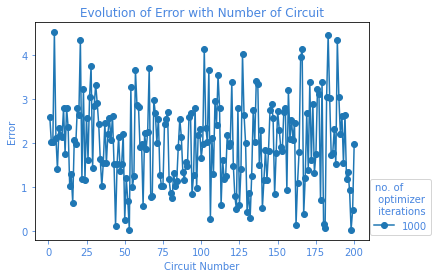

In [32]:
import matplotlib.pyplot as plt
COLOR = '#4a87e0'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# function to plot results for comparison 
def plot_result(results):

    plt.plot(results[1], results[0], label=str(iteration), marker='o', ls='-')

    plt.xlabel('Circuit Number')
    plt.ylabel('Error')

    plt.title('Evolution of Error with Number of Circuit')

    plt.legend(loc="lower right", bbox_to_anchor=(1.2, 0), title='no. of \n optimizer\n iterations')
    plt.show()

plot_result(results)